In [154]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import fractional_matrix_power
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix
from sklearn import datasets
import pandas as pd
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

PART 1

Input:
data - NxD matrix containing data
N - number of eigenvalues and eigenfunctions to 
Output:
lambda_l - vector containing Z eigenvalues
psy_l - NxZ matrix containing Z eigenfunctions

In [155]:
def diffusion_map(data, Z):
    D = distance_matrix(data, data)
    eps = 0.05 * max(map(max, D))
    W = np.exp(-np.square(D) / eps)
    P = np.diag(np.sum(W, axis=1))
    K_1=np.matmul(W, np.linalg.inv(P))
    K = np.matmul(np.linalg.inv(P),K_1 )
    Q = np.diag(np.sum(K, axis=1))
    Q_pow = fractional_matrix_power(Q, -0.5)
    T_hat = np.matmul(np.matmul(Q_pow, K), Q_pow)
    a, v = np.linalg.eigh(T_hat)
    a_l = a[-(Z+1):]
    v_l = v[:, -(Z+1):]
    # omit last column, since it's constant
    lambda_l = np.power(a_l, (1/eps))[:-1]
    psy_l = np.matmul(Q_pow, v)[:, -(Z+1):][:, :-1]
    # flip columns (to be in inceasing order of eigenvalues)
    lambda_l = np.flip(lambda_l)
    psy_l = np.flip(psy_l, axis=1)
    return lambda_l, psy_l

In [156]:
# generate data points
N = 1000
Z_1 =5
Z_2=3
Z_3=2
X_org = list()
tk_org = list()
for k in range(N):
    tk = (2 * np.pi * k)/(N+1)
    cos_tk = math.cos(tk)
    sin_tk = math.sin(tk)
    entry =  [cos_tk, sin_tk]
    tk_org.append(tk)
    X_org.append(entry)
X_org = np.array(X_org)
# get eigenvalues and eigenvectors
lambda_l_1, psy_l_1 = diffusion_map(X, Z_1)
lambda_l_2, psy_l_2 = diffusion_map(X, Z_2)
lambda_l_3, psy_l_3 = diffusion_map(X, Z_3)

In [157]:
print(lambda_l_1)

[0.99986208 0.99985886 0.99944399 0.99943966 0.99877023]


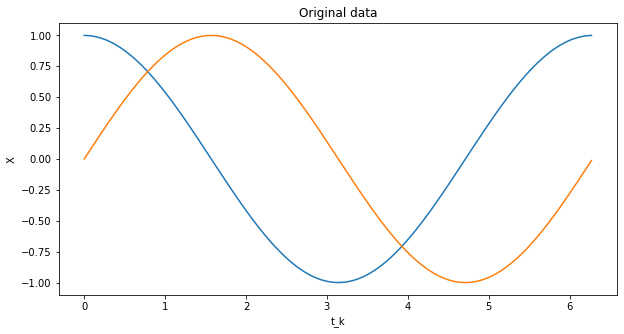

In [158]:
# plot original data
plt.figure(figsize=(10, 5))
plt.title("Original data")
plt.xlabel("t_k")
plt.ylabel("X")
plt.plot(tk_org, X_org)

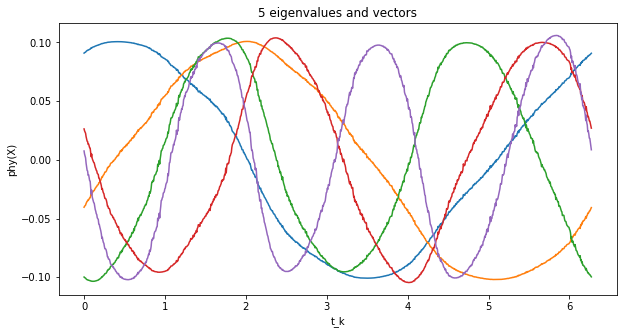

In [159]:
plt.figure(figsize=(10, 5))
plt.title("5 eigenvalues and vectors")
plt.xlabel("t_k")
plt.ylabel("phy(X)")
plt.plot(tk_org, psy_l_1)

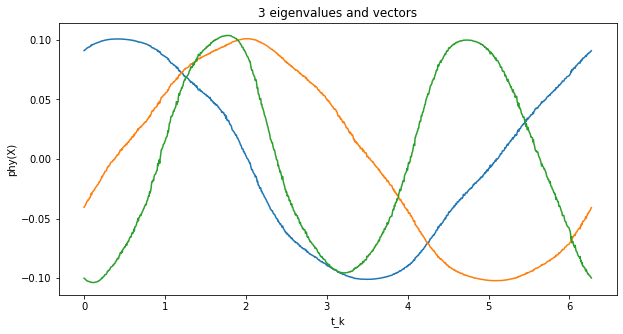

In [160]:
plt.figure(figsize=(10, 5))
plt.title("3 eigenvalues and vectors")
plt.xlabel("t_k")
plt.ylabel("phy(X)")
plt.plot(tk_org, psy_l_2)

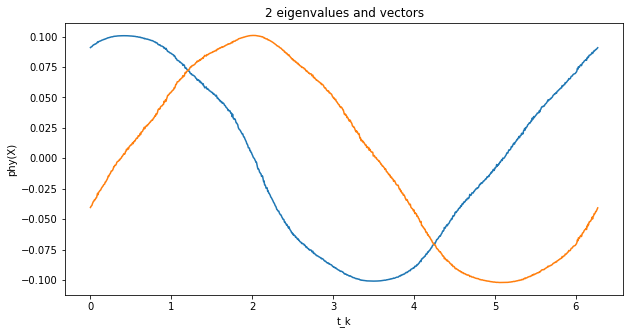

In [153]:
plt.figure(figsize=(10, 5))
plt.title("2 eigenvalues and vectors")
plt.xlabel("t_k")
plt.ylabel("phy(X)")
plt.plot(tk_org, psy_l_3)

C:\Users\Afaq\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


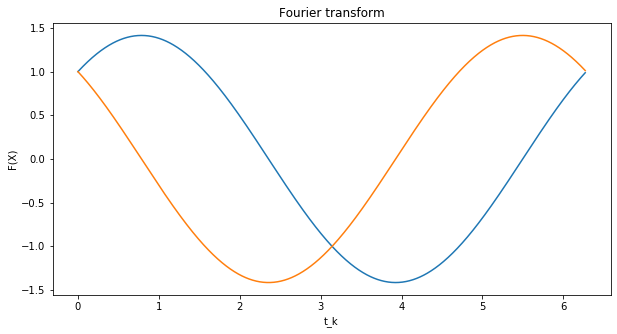

In [29]:
fourier = fft(X)
plt.figure(figsize=(10, 5))
plt.title("Fourier transform")
plt.xlabel("t_k")
plt.ylabel("F(X)")
plt.plot(tk_org, fourier)

PART 2

In [73]:
#comps is the number of principal components we want to consider
def pca(data, comps):
    # step 1 - centralize data
    data = data - data.mean(axis=0)
    # SVD decomposition
    u, s, v = np.linalg.svd(data, full_matrices=False)
    # energy calculation : 1/trace(s) * sum(sig_i)
    energy = (np.sum(s[:comps]) / np.sum(s) )* 100
    print("Energy: ", energy, "%")
    # ignoring eigen values which are not used
    s[comps:] = 0
    #project data onto PCs
    proj = np.matmul(u, np.diag(s))
    return np.matmul(proj,v)

In [162]:
X, color = datasets.make_swiss_roll(n_samples=2000, noise=0, random_state=50)

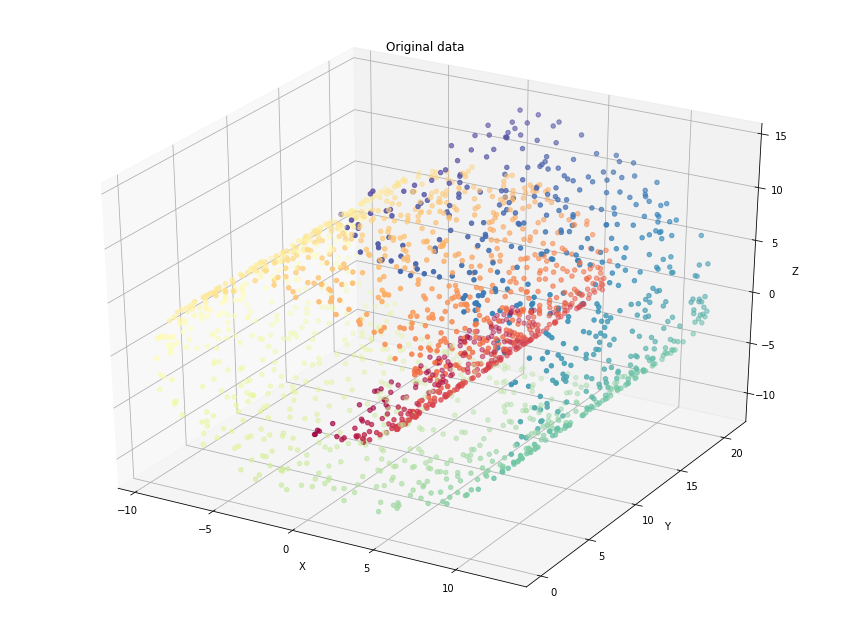

In [163]:
fig = plt.figure(figsize=(15, 25))

ax = fig.add_subplot(212, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

Diffusion map for 10 psy funtion

In [164]:
Z = 10
lambda_l, psy_l = diffusion_map(X, Z)

Comparing psy_1 against other psy funtions

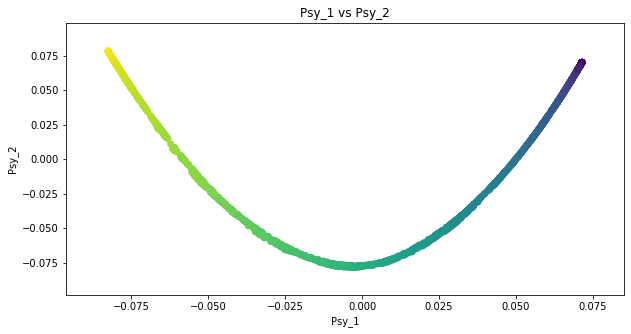

In [165]:
# psy_1 and psy_2
fig = plt.figure(figsize=(10, 5))
plt.title("Psy_1 vs Psy_2")
plt.xlabel("Psy_1")
plt.ylabel("Psy_2")
plt.scatter(psy_l[:, 0], psy_l[:, 1], c=color)
fig.savefig("t_2_p_2_1.png")

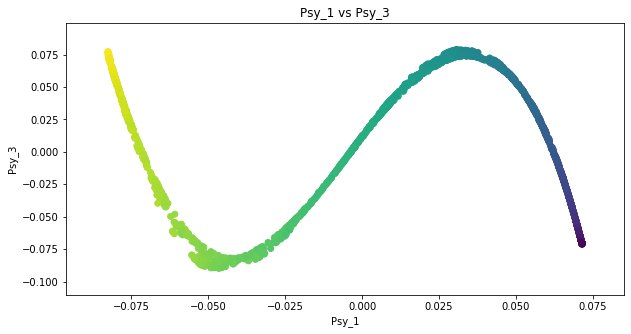

In [166]:
# psy_1 and psy_3
fig = plt.figure(figsize=(10, 5))
plt.title("Psy_1 vs Psy_3")
plt.xlabel("Psy_1")
plt.ylabel("Psy_3")
plt.scatter(psy_l[:, 0], psy_l[:, 2], c=color)
fig.savefig("t_2_p_2_2.png")

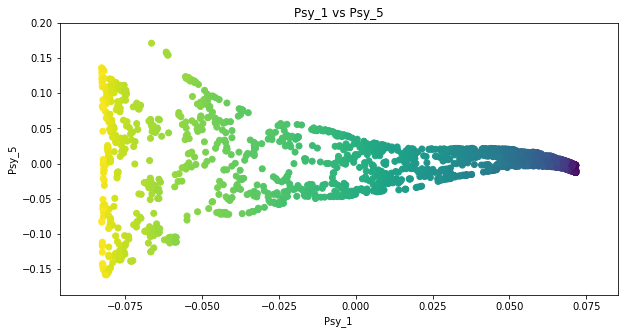

In [167]:
# psy_1 and psy_5
fig = plt.figure(figsize=(10, 5))
plt.title("Psy_1 vs Psy_5")
plt.xlabel("Psy_1")
plt.ylabel("Psy_5")
plt.scatter(psy_l[:, 0], psy_l[:, 4], c=color)
fig.savefig("t_2_p_2_3.png")

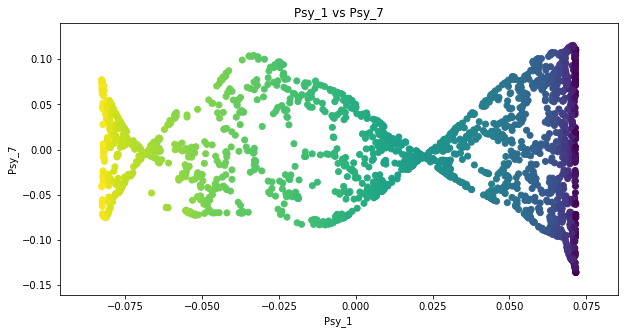

In [168]:
# psy_1 and psy_7
fig = plt.figure(figsize=(10, 5))
plt.title("Psy_1 vs Psy_7")
plt.xlabel("Psy_1")
plt.ylabel("Psy_7")
plt.scatter(psy_l[:, 0], psy_l[:, 6], c=color)
fig.savefig("t_2_p_2_4.png")

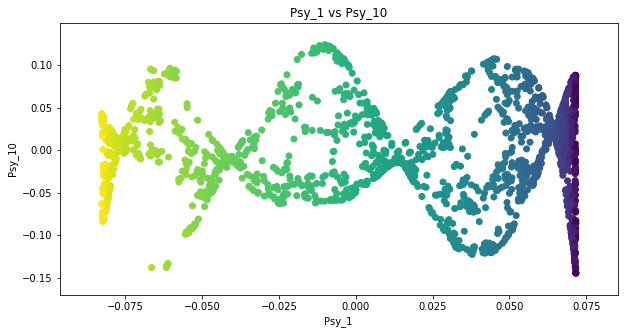

In [169]:
# psy_1 and psy_10
fig = plt.figure(figsize=(10, 5))
plt.title("Psy_1 vs Psy_10")
plt.xlabel("Psy_1")
plt.ylabel("Psy_10")
plt.scatter(psy_l[:, 0], psy_l[:, 9], c=color)
fig.savefig("t_2_p_2_5.png")

PCA

PCA with 3 components

Energy:  100.0 %


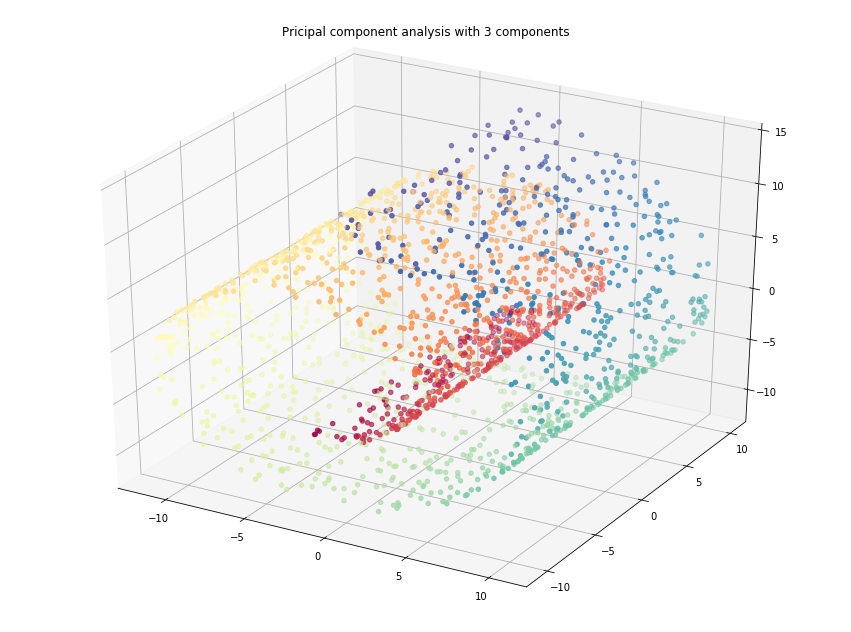

In [170]:
pca_3 = pca(X, 3)
fig = plt.figure(figsize=(15, 25))

ax = fig.add_subplot(212, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Pricipal component analysis with 3 components\n")
plt.show()
fig.savefig("t_2_p_2_6.png")

Energy:  69.41001918422818 %


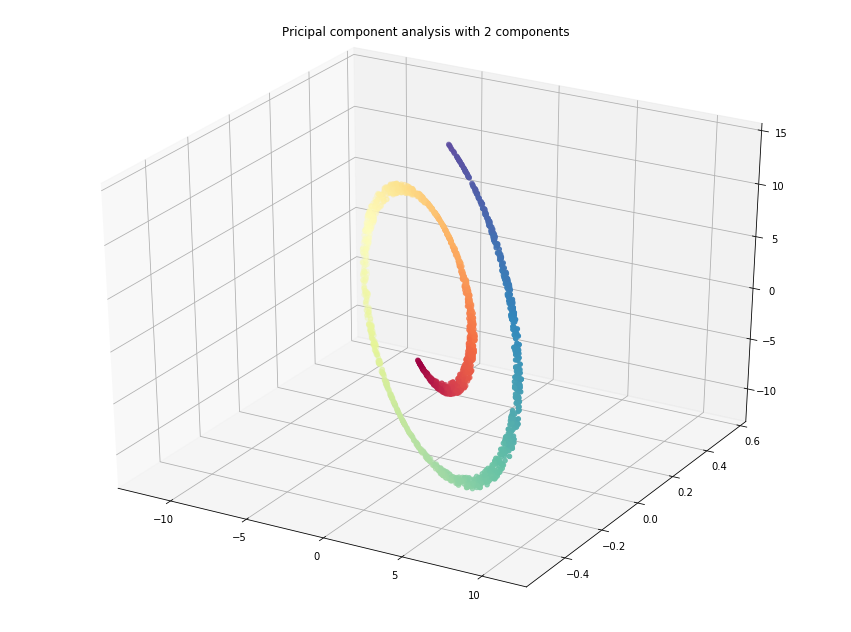

In [171]:
pca_2 = pca(X, 2)
fig = plt.figure(figsize=(15, 25))

ax = fig.add_subplot(212, projection='3d')
ax.scatter(pca_2[:, 0], pca_2[:, 1], pca_2[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Pricipal component analysis with 2 components\n")
plt.show()
fig.savefig("t_2_p_2_7.png")

If we had 1000 samples?

In [172]:
X_2, color = datasets.make_swiss_roll(n_samples=1000, noise=0, random_state=50)

PCA with 3 components

Energy:  100.0 %


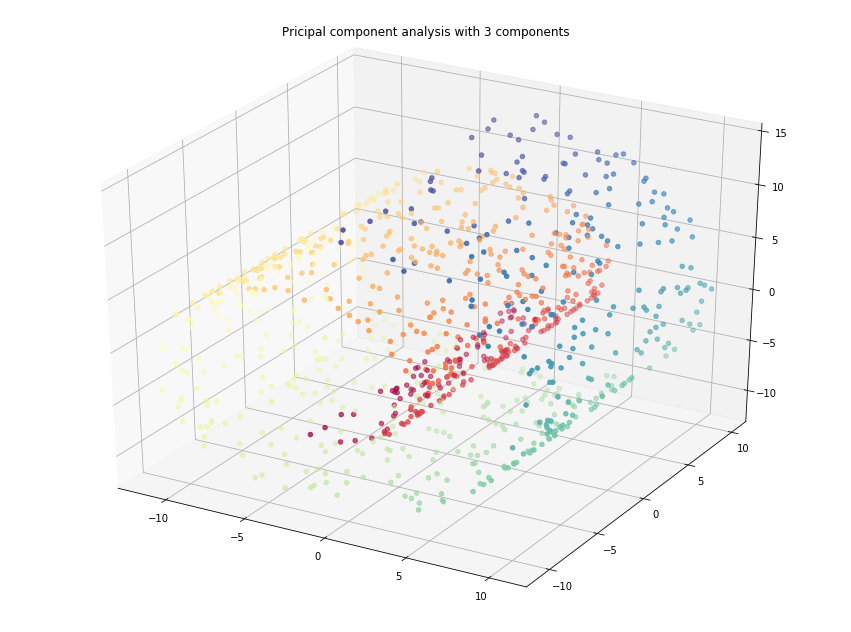

In [173]:
pca_3 = pca(X_2, 3)
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(212, projection='3d')
ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Pricipal component analysis with 3 components\n")
plt.show()
fig.savefig("t_2_p_2_8.png")

Energy:  69.09649465124991 %


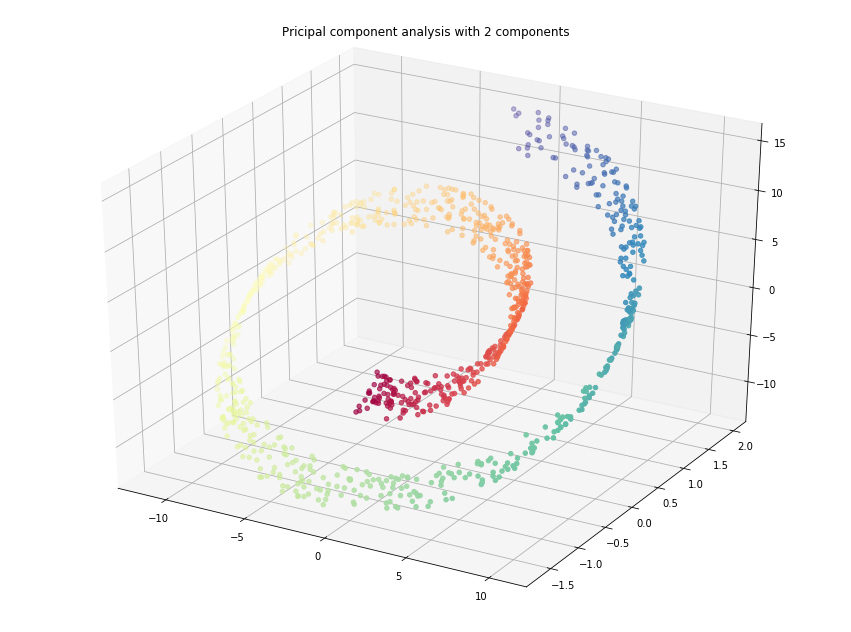

In [174]:
pca_2 = pca(X_2, 2)
fig = plt.figure(figsize=(15, 25))

ax = fig.add_subplot(212, projection='3d')
ax.scatter(pca_2[:, 0], pca_2[:, 1], pca_2[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Pricipal component analysis with 2 components\n")
plt.show()
fig.savefig("t_2_p_2_9.png")

PART 3 

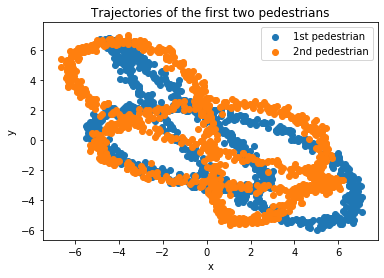

In [96]:
data = np.loadtxt(fname="data_DMAP_PCA_vadere.txt")
#print(data) #use these to check whether the data is properly loaded
#print(np.shape(data))

#reshape dataset (just renaming in this case) and center the data
X = data
X = X-X.mean(0)

# plot the trajectories of the first two pedestrians
plt.scatter(X[:, 0], X[:, 1], label='1st pedestrian')#pedestrian 1
plt.scatter(X[:, 2], X[:, 3], label='2nd pedestrian')#pedestrian 2
plt.title('Trajectories of the first two pedestrians')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

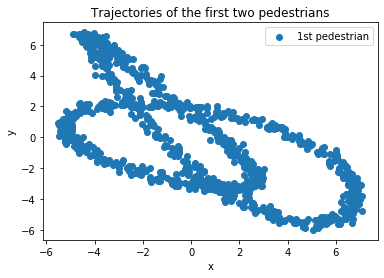

In [97]:
plt.scatter(X[:, 0], X[:, 1], label='1st pedestrian')#pedestrian 1
plt.title('Trajectories of the first two pedestrians')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

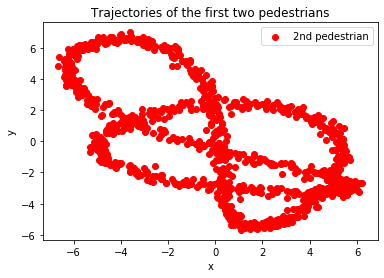

In [100]:
plt.title('Trajectories of the first two pedestrians')
plt.scatter(X[:, 2], X[:, 3], label='2nd pedestrian',color='red')#pedestrian 2
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

In [120]:
Z = 30
lambda_l, psy_l = diffusion_map(data, Z)

In [121]:
#P=W(W′W)^−1(W′eig_func1) projection
#data*(data.T*data)^-1*(data.T*psy_l1)

1st projection

In [122]:
p_1_1 = np.linalg.inv(data.T.dot(data))
p_1_2 = np.dot(data.T,psy_l[:,0])
p_1_3 = np.dot(data,p_1_1)
P_1=np.dot(p_1_3,p_1_2)

2nd projection

In [123]:
p_2_1 = np.linalg.inv(data.T.dot(data))
p_2_2 = np.dot(data.T,psy_l[:,1])
p_2_3 = np.dot(data,p_2_1)
P_2=np.dot(p_2_3,p_2_2)

3rd projection

In [124]:
p_3_1 = np.linalg.inv(data.T.dot(data))
p_3_2 = np.dot(data.T,psy_l[:,2])
p_3_3 = np.dot(data,p_3_1)
P_3=np.dot(p_3_3,p_3_2)

Projection onto 1st 2 eigenfuncs

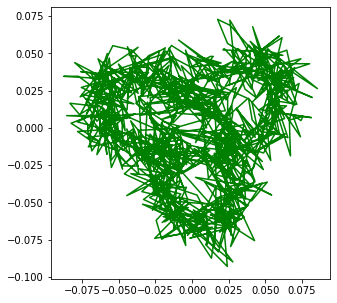

In [175]:
plt.figure(figsize=(5, 5))
plt.plot(P_1, P_2,color="green")

Projection onto 3 eigenfuncs

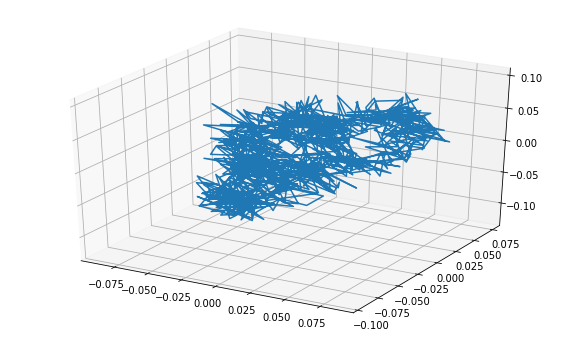

<Figure size 720x720 with 0 Axes>

In [182]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
plt.figure(figsize=(10, 10))
ax.plot(P_1, P_2, P_3)

C:\Users\Afaq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


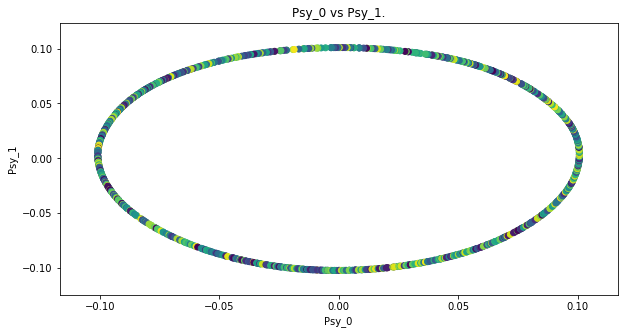

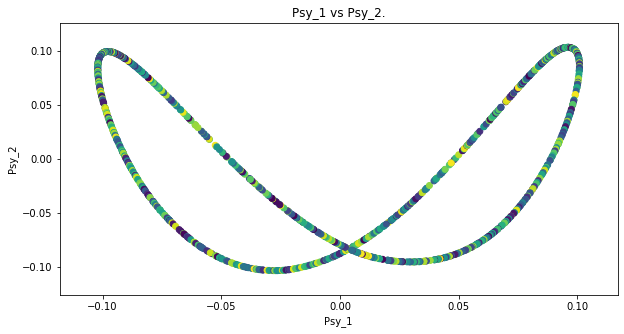

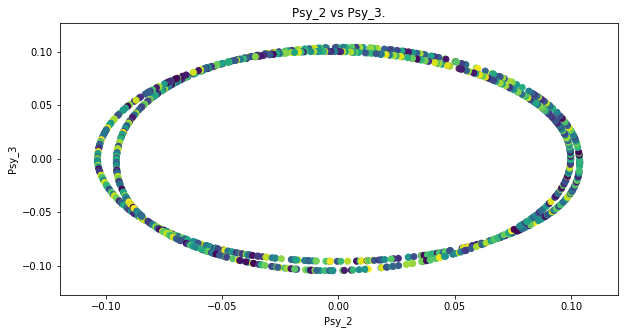

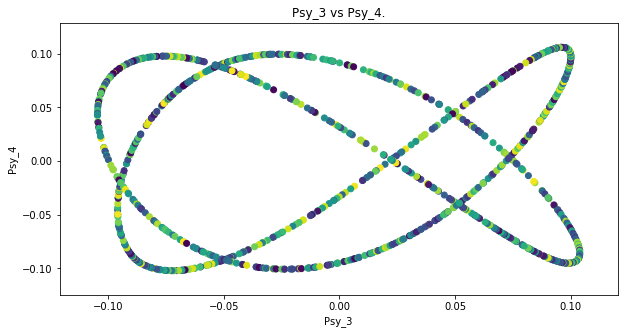

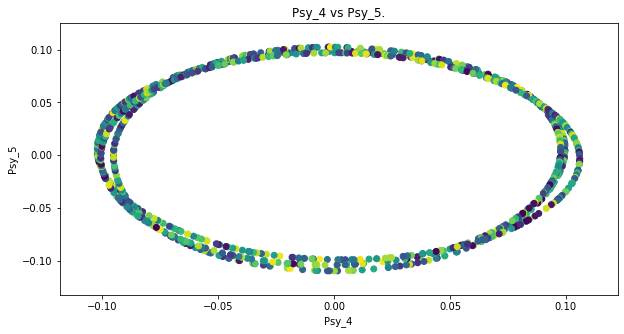

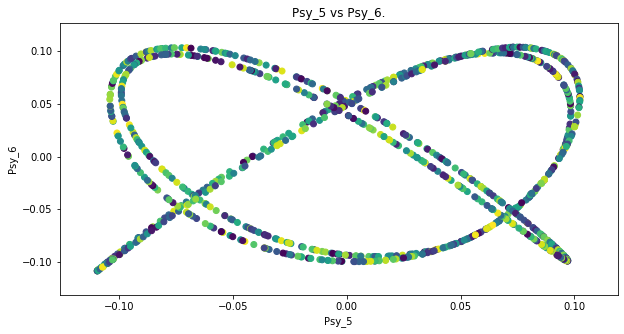

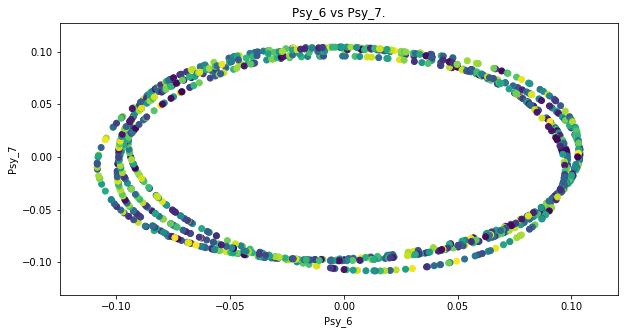

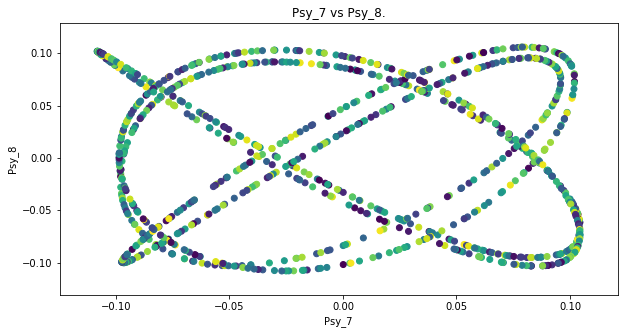

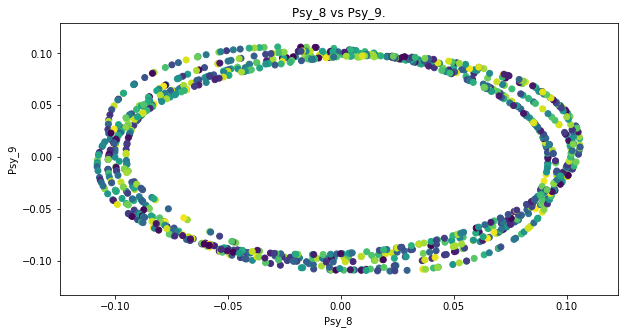

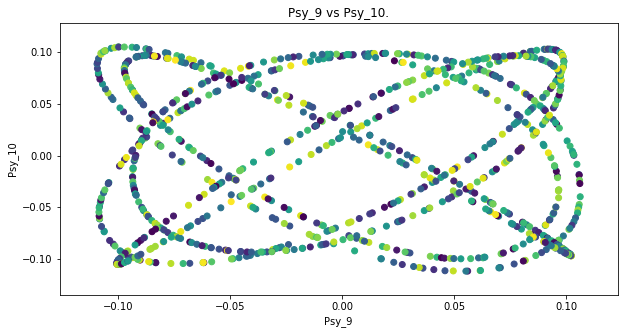

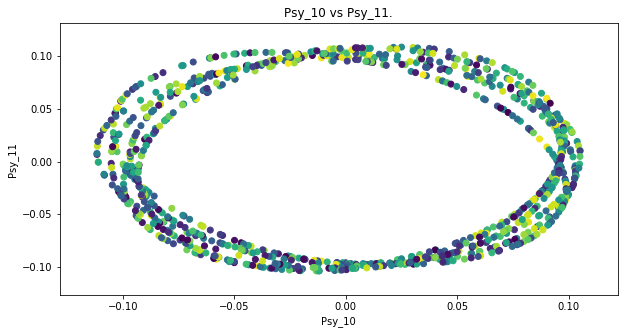

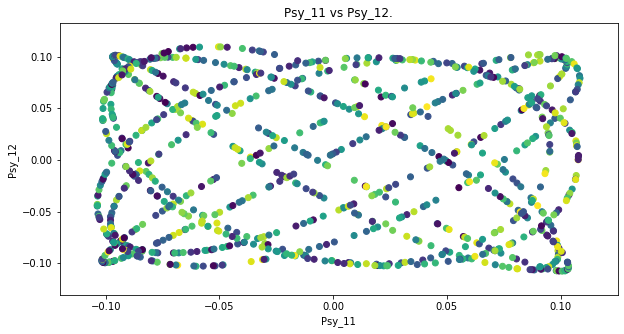

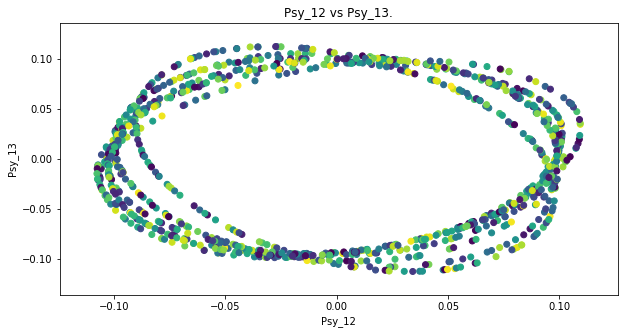

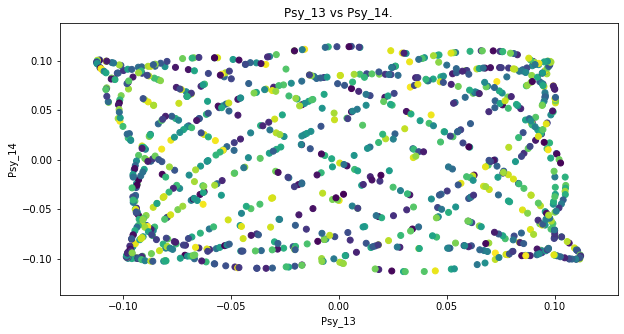

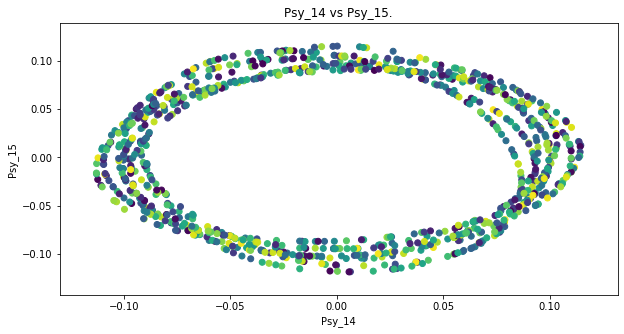

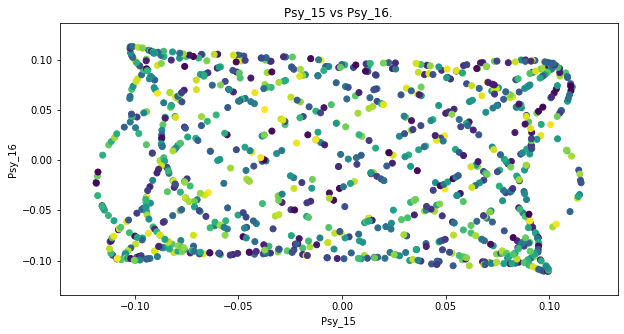

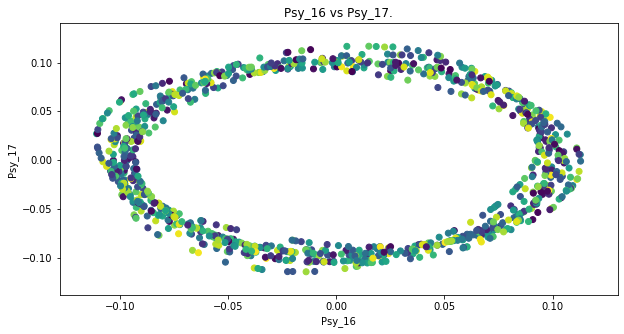

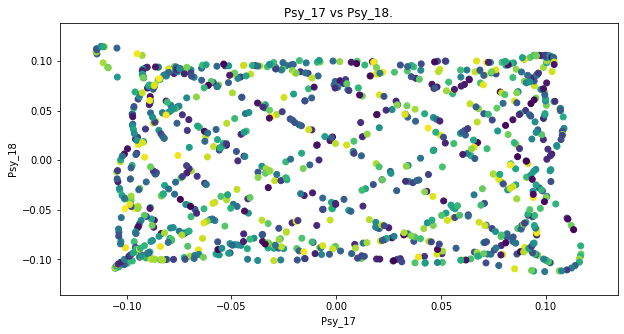

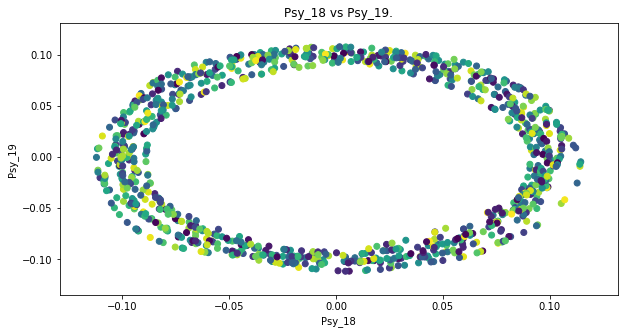

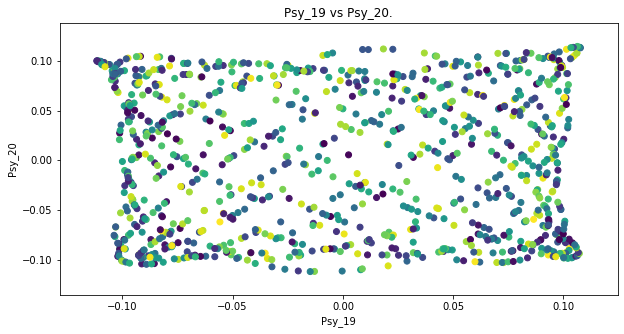

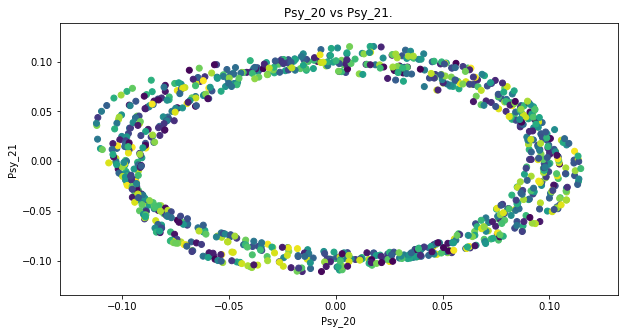

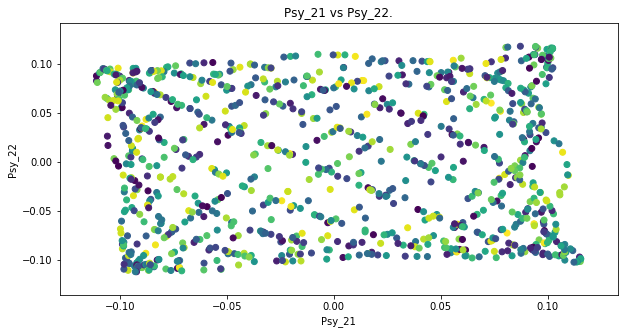

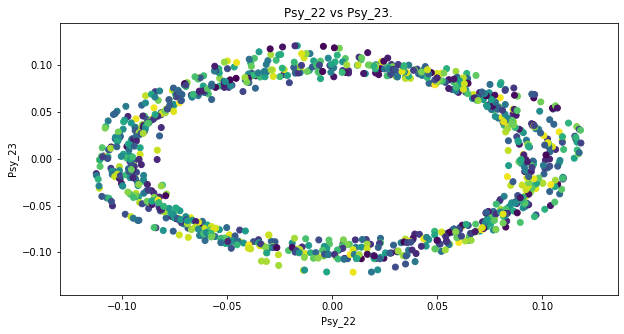

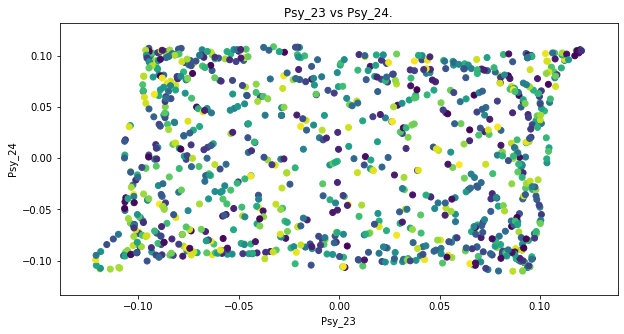

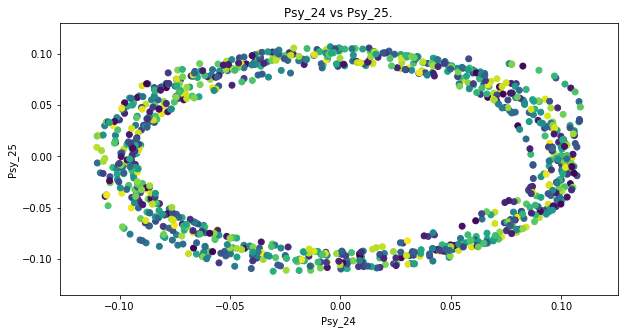

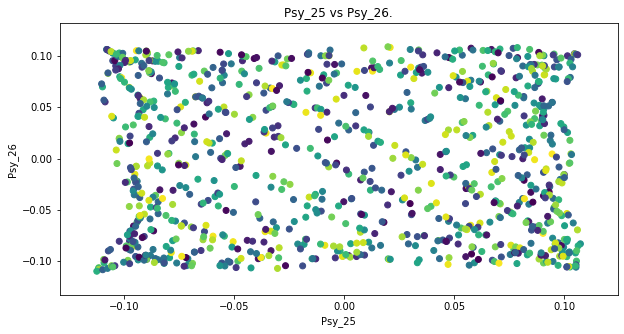

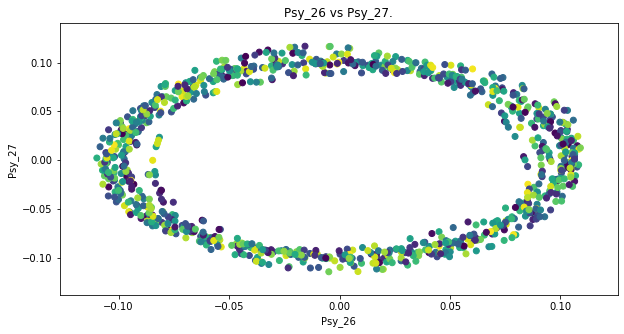

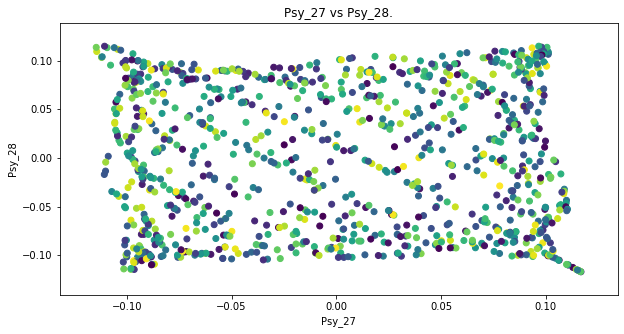

In [144]:
for i in range(0,28):
    fig = plt.figure(figsize=(10, 5))
    plt.title("Psy_{} vs Psy_{}.".format(i,i+1))
    plt.xlabel("Psy_{}".format(i))
    plt.ylabel("Psy_{}".format(i+1))
    plt.scatter(psy_l[:, i], psy_l[:, i+1], c=color)
    i=i+1